In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})

In [2]:
def vis_k_fold():

    runs = os.listdir("../models")
    k_fold = None
    for run in runs[:]:
        if "K_Fold" in run:
            k_fold = run
    k_fold_runs = os.listdir(os.path.join("../models", k_fold))

    mean_df = None
    concat_df = None
    for i, fold in enumerate(sorted(k_fold_runs)):

        df = pd.read_csv(os.path.join("../models", k_fold, fold, 'results.csv'), index_col=0)
        if mean_df is None:
            mean_df = df.loc['Mean'].rename("Fold 0")
            concat_df = df
        else:
            mean_df = pd.concat((mean_df, df.loc['Mean'].rename(f"Fold {i}")), axis=1)
            concat_df = pd.concat((concat_df, df), axis=0)

    with open("tables/k_fold_table.tex", 'w') as fd:
        mean_df.transpose().to_latex(fd)

    result_dict = {}
    for appliance in set(concat_df.index):
        if 'Mean' not in appliance:
            result_dict[appliance] = concat_df.loc[appliance]['F1'].values


    fig, ax = plt.subplots()
    ax.boxplot(result_dict.values())
    ax.set_xticklabels(result_dict.keys(), rotation = 45)
    ax.set_ylabel('F1 Score')
    plt.tight_layout()
    plt.savefig('figures/f1_k_fold_box.svg', dpi = 300)
    plt.show()

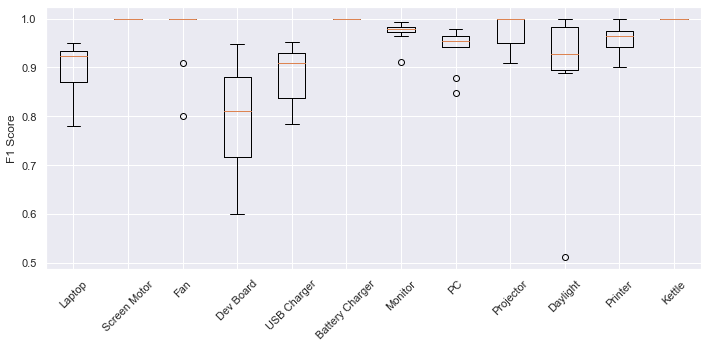

In [3]:
vis_k_fold()